# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
diabetic_df = pd.read_csv('../data/diabetic_data_cleaned.csv', low_memory=False)

In [3]:
diabetic_df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,149190,55629189,Caucasian,Female,10-20,1,1,7,3,missing,...,No,Up,No,No,No,No,No,Ch,Yes,>30
1,64410,86047875,AfricanAmerican,Female,20-30,1,1,7,2,missing,...,No,No,No,No,No,No,No,No,Yes,NO
2,500364,82442376,Caucasian,Male,30-40,1,1,7,2,missing,...,No,Up,No,No,No,No,No,Ch,Yes,NO
3,16680,42519267,Caucasian,Male,40-50,1,1,7,1,missing,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
4,35754,82637451,Caucasian,Male,50-60,2,1,2,3,missing,...,No,Steady,No,No,No,No,No,No,Yes,>30


In [4]:
print('Data set dimensions :', diabetic_df.shape)
print(diabetic_df.info())

Data set dimensions : (98591, 48)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98591 entries, 0 to 98590
Data columns (total 48 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   encounter_id              98591 non-null  int64 
 1   patient_nbr               98591 non-null  int64 
 2   race                      98591 non-null  object
 3   gender                    98591 non-null  object
 4   age                       98591 non-null  object
 5   admission_type_id         98591 non-null  int64 
 6   discharge_disposition_id  98591 non-null  int64 
 7   admission_source_id       98591 non-null  int64 
 8   time_in_hospital          98591 non-null  int64 
 9   medical_specialty         98591 non-null  object
 10  num_lab_procedures        98591 non-null  int64 
 11  num_procedures            98591 non-null  int64 
 12  num_medications           98591 non-null  int64 
 13  number_outpatient         98591 non-null  

### Explore the data

In [5]:
diabetic_df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,9.859100e+04,9.859100e+04,98591.000000,98591.000000,98591.000000,98591.000000,98591.000000,98591.000000,98591.000000,98591.000000,98591.000000,98591.000000,98591.000000
mean,1.661307e+08,5.460825e+07,1.965737,3.865221,5.195413,4.414226,43.020681,1.341258,16.078679,0.372691,0.199542,0.636782,7.484537
std,1.027569e+08,3.871405e+07,1.280200,6.051586,2.864792,2.980687,19.637854,1.705439,8.081041,1.270902,0.938722,1.261736,1.843579
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.000000
25%,8.551950e+07,2.344506e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,11.000000,0.000000,0.000000,0.000000,6.000000
50%,1.531745e+08,4.603736e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.314686e+08,8.779924e+07,3.000000,3.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,7.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [6]:
diabetic_df.describe(exclude=np.number)

,race,gender,age,medical_specialty,diag_1,diag_2,diag_3,max_glu_serum,A1Cresult,metformin,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
count,98591,98591,98591,98591,98591,98591,98591,98591,98591,98591,...,98591,98591,98591,98591,98591,98591,98591,98591,98591,98591
unique,6,2,10,73,714,742,787,4,4,4,...,1,4,4,2,2,2,2,2,2,3
top,Caucasian,Female,70-80,missing,428,428,250,None,None,No,...,No,No,No,No,No,No,No,No,Yes,NO
freq,73826,53076,25390,48661,6726,6526,11473,93450,82134,78980,...,98591,46097,97904,98578,98590,98589,98590,52808,76064,52168


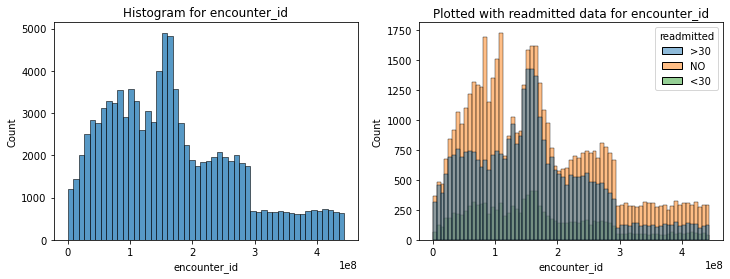

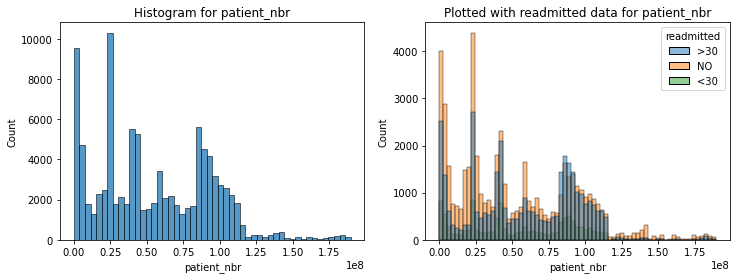

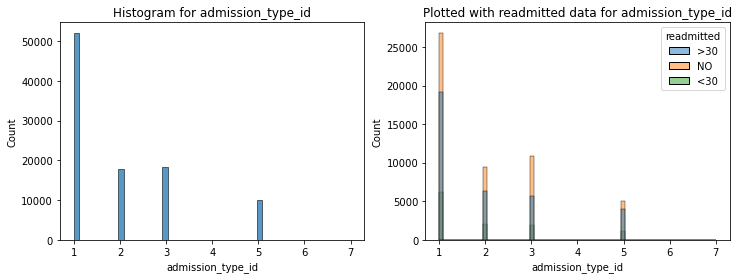

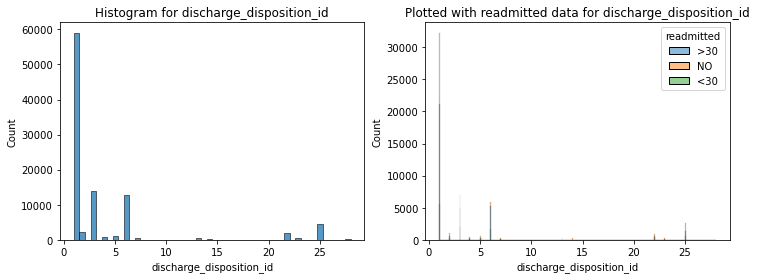

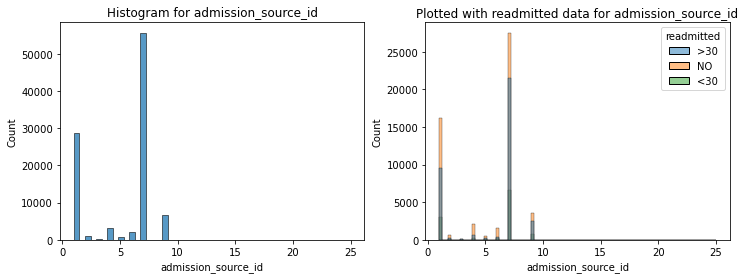

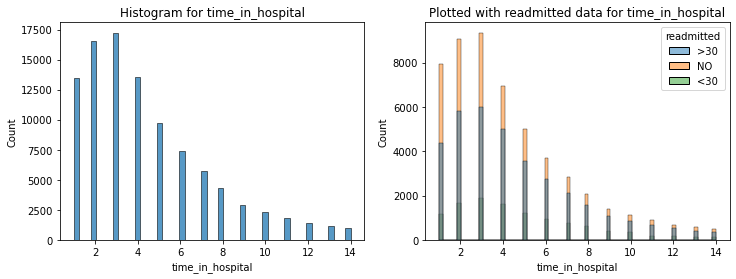

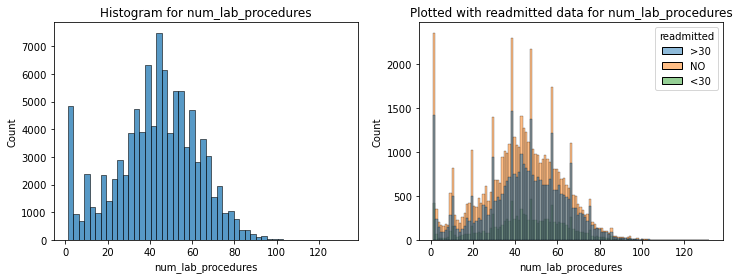

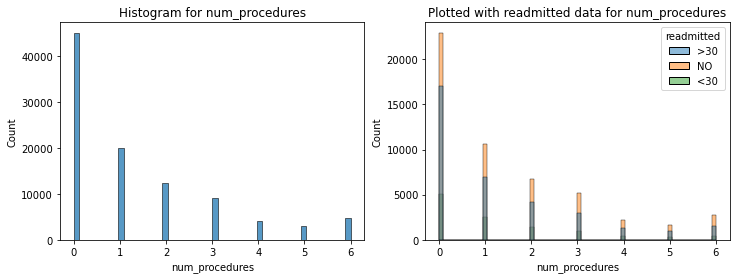

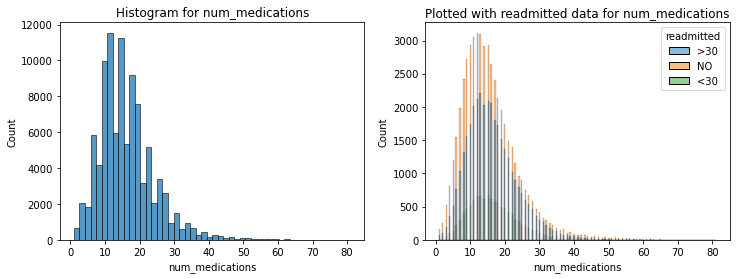

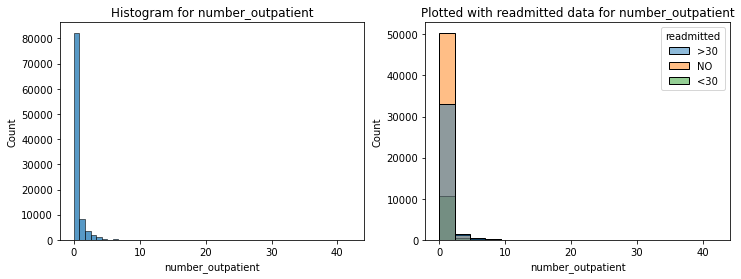

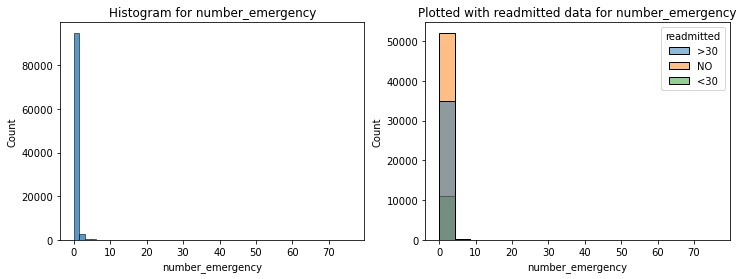

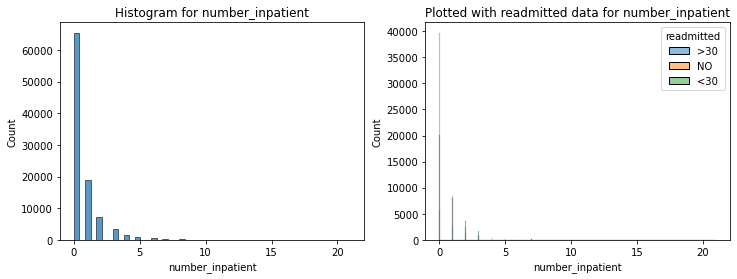

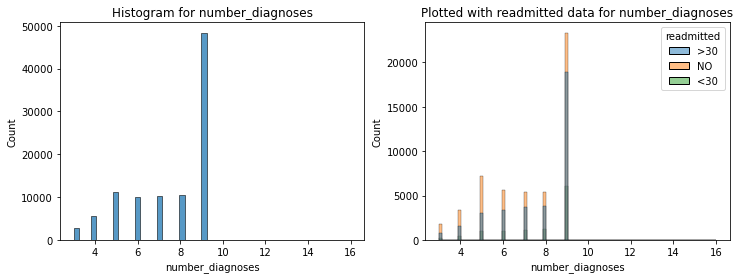

In [7]:
# Create list of numerical column names
numerical = list(diabetic_df.select_dtypes(include='number').columns)

for var in numerical:
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))
    sns.histplot(x=var, bins=50, data=diabetic_df ,ax=ax[0])
    ax[0].set_title(f"Histogram for {var}")
    
    sns.histplot(x=var, hue='readmitted', data=diabetic_df, ax=ax[1], alpha=0.5)  
    ax[1].set_title(f"Plotted with readmitted data for {var}")

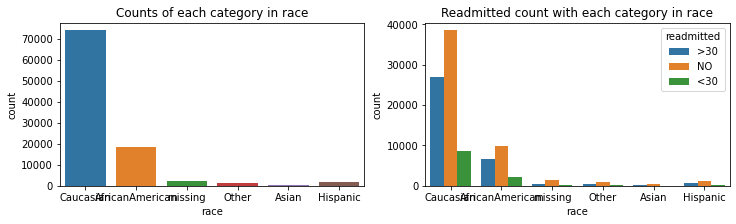

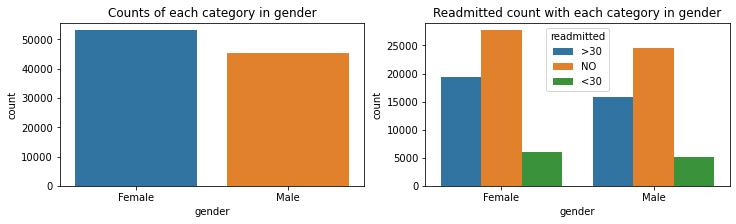

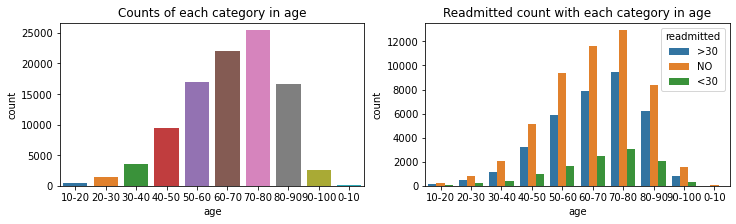

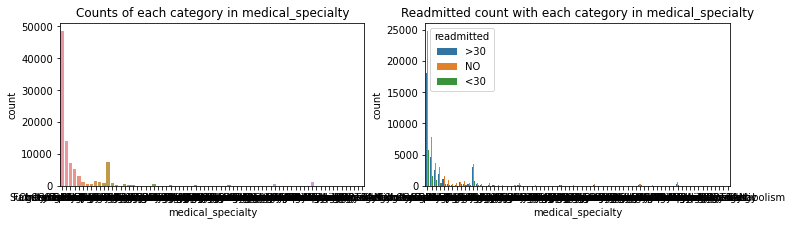

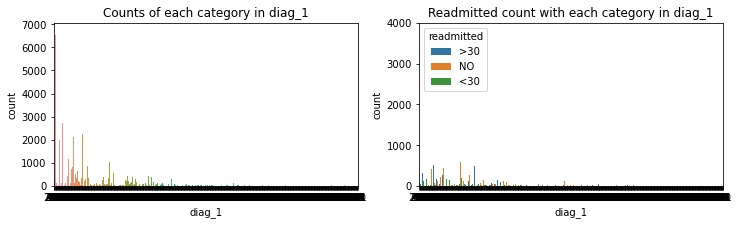

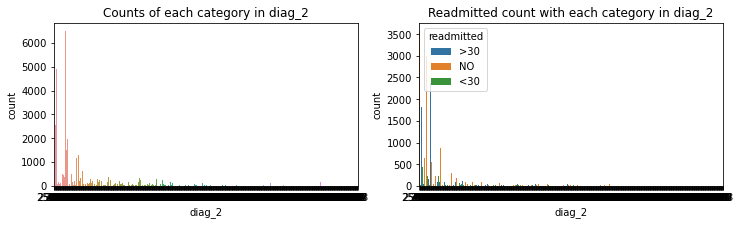

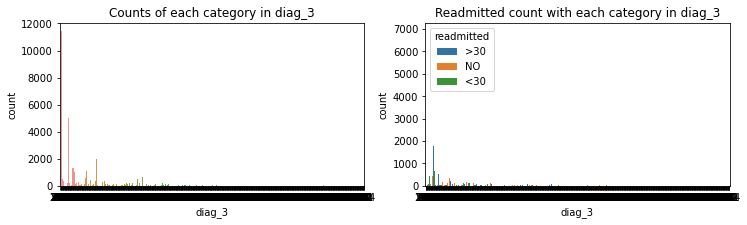

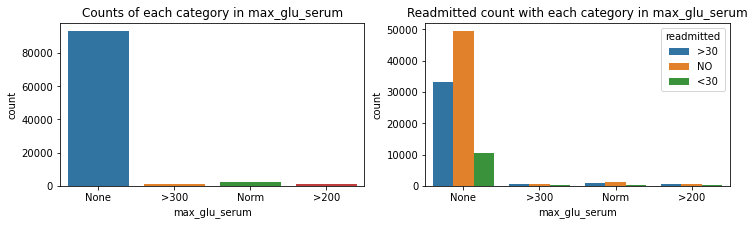

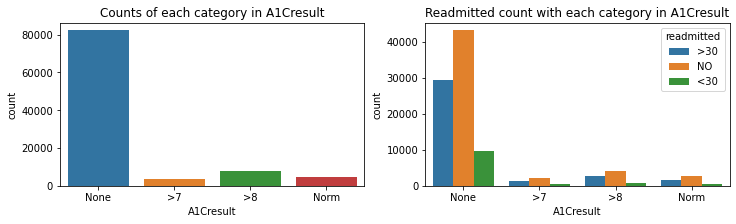

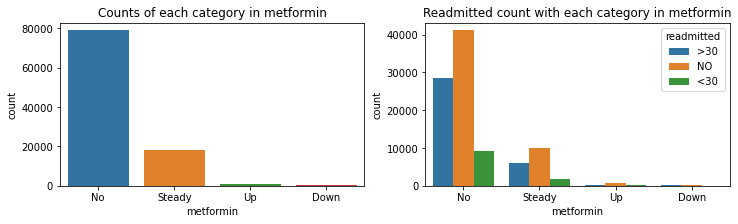

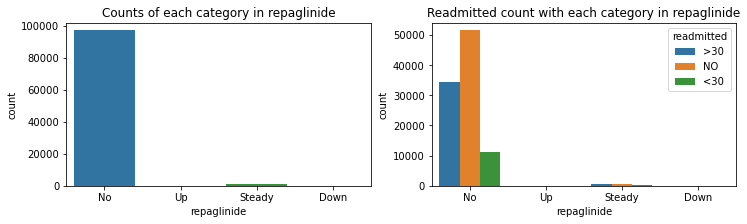

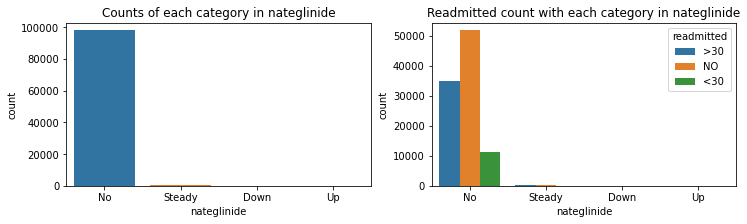

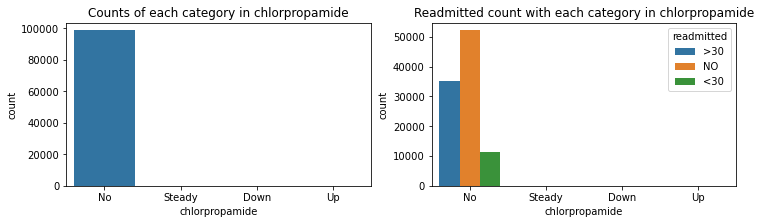

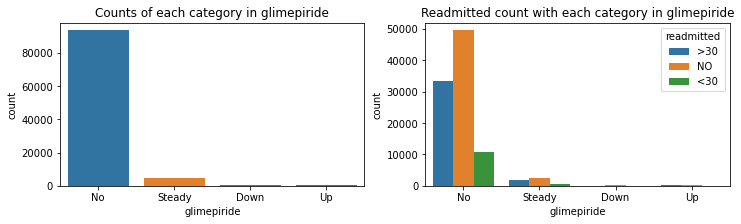

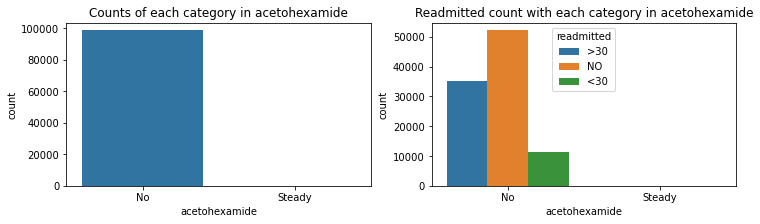

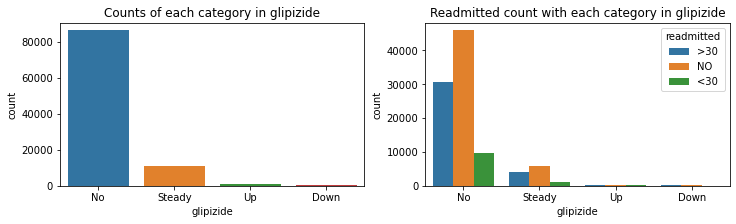

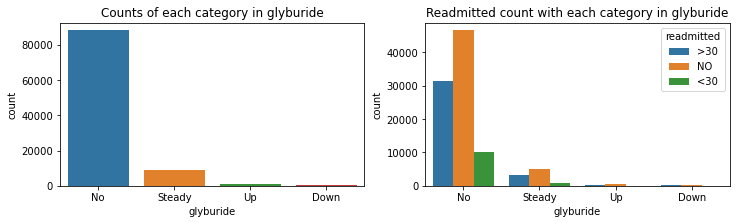

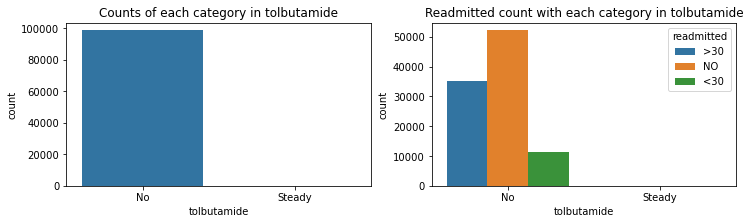

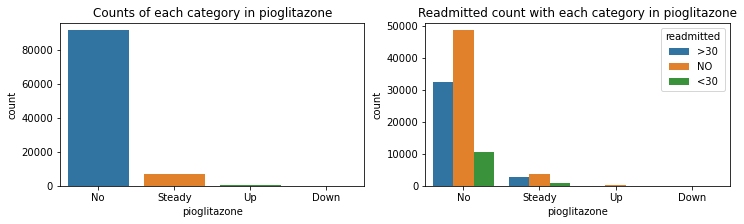

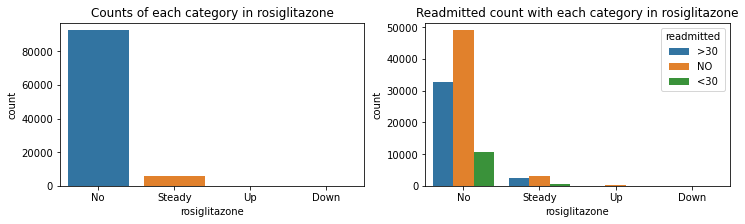

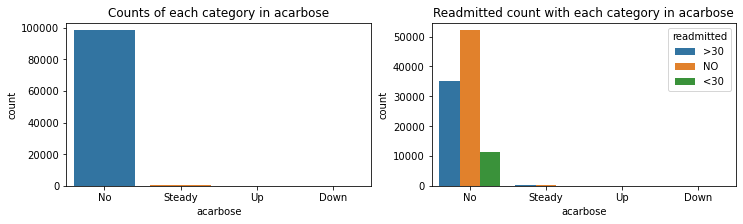

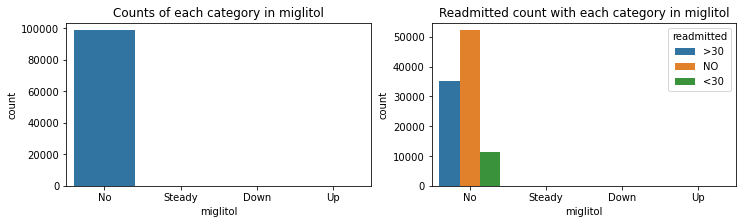

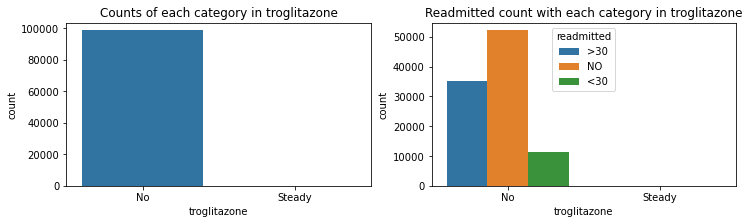

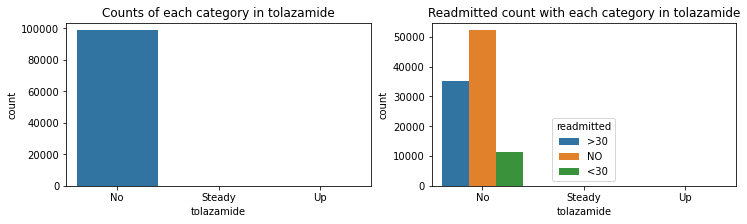

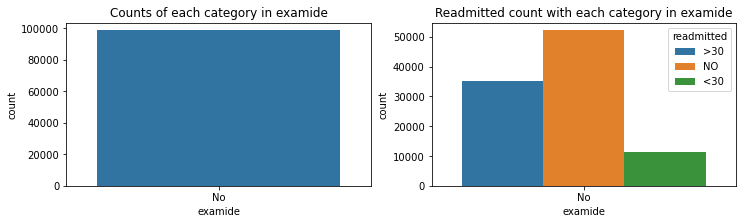

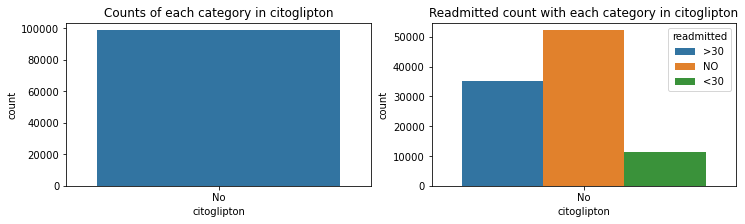

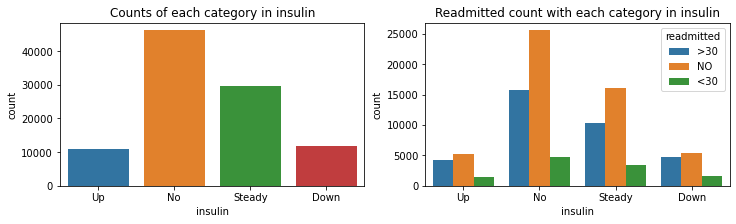

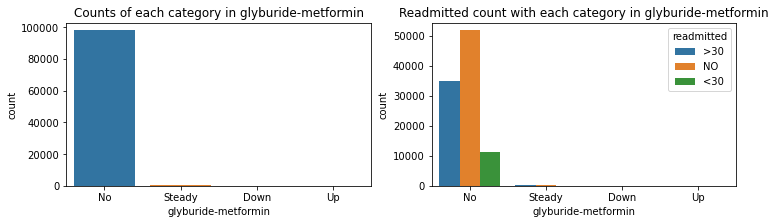

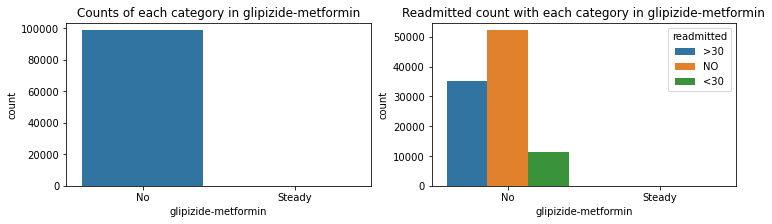

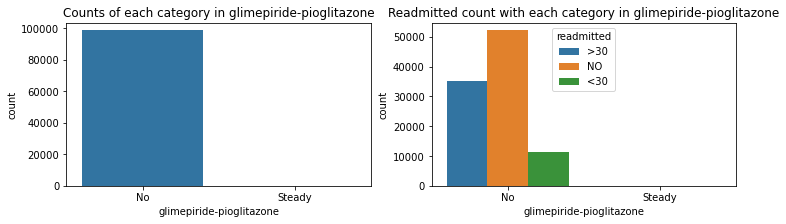

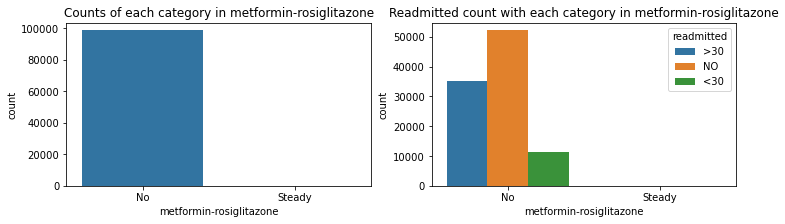

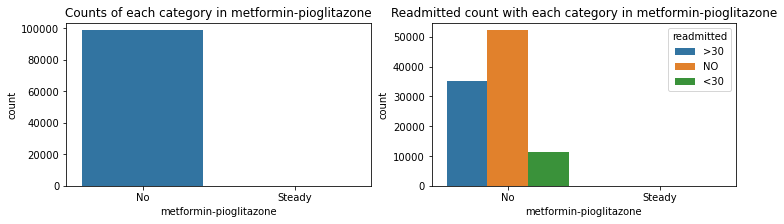

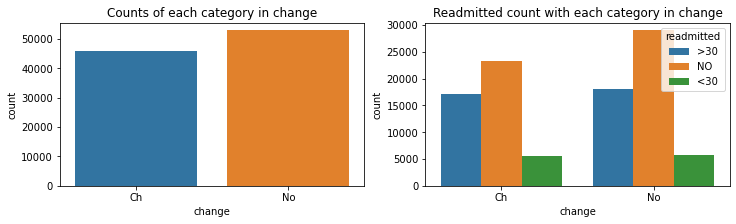

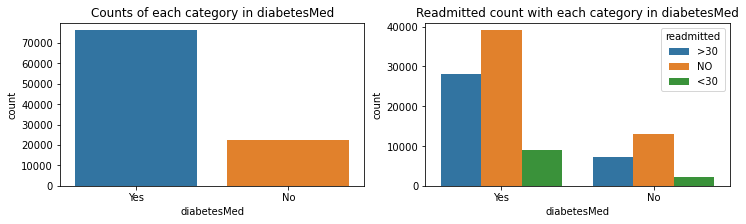

In [8]:
plt.rcParams.update({'figure.max_open_warning': 0})

# Create list of categorical column names
categorical_list = list(diabetic_df.select_dtypes(exclude='number').columns)

categorical = categorical_list[:34]

# Plot counts for non-numerical variables
for var in categorical:
    fig, ax = plt.subplots(1, 2, figsize=(12, 3))    
    sns.countplot(x=var, data=diabetic_df, ax=ax[0])
    ax[0].set_title(f"Counts of each category in {var}")
    
    sns.countplot(x=var, hue = 'readmitted', data=diabetic_df, ax=ax[1])
    ax[1].set_title(f"Readmitted count with each category in {var}");
   

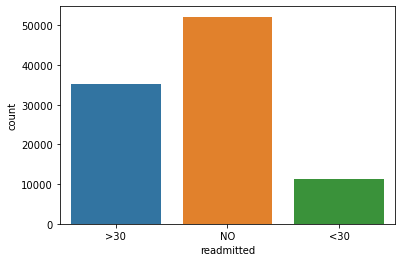

In [9]:
sns.countplot(x='readmitted', data=diabetic_df);

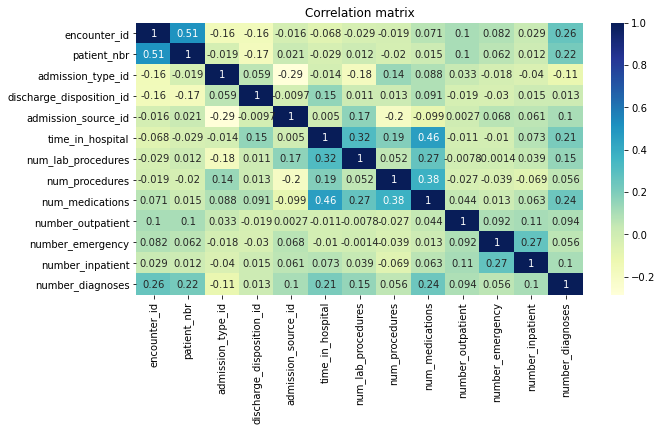

In [10]:
plt.figure(figsize=(10, 5))
sns.heatmap(diabetic_df.corr(), annot=True, cmap='YlGnBu')
plt.title("Correlation matrix");

#### Observations:
- time_in_hospital vs number_diagnoses, num_medications, num_procedures, num_lab_procedures (correlated)
- admission_type_id vs num_procedures  (correlated)
- num_lab_procedures vs admission_source_id
- num_procedures vs num_medications

In [11]:
import warnings
warnings.filterwarnings("ignore")

# Import package for predictive power score matrix
import ppscore as pps

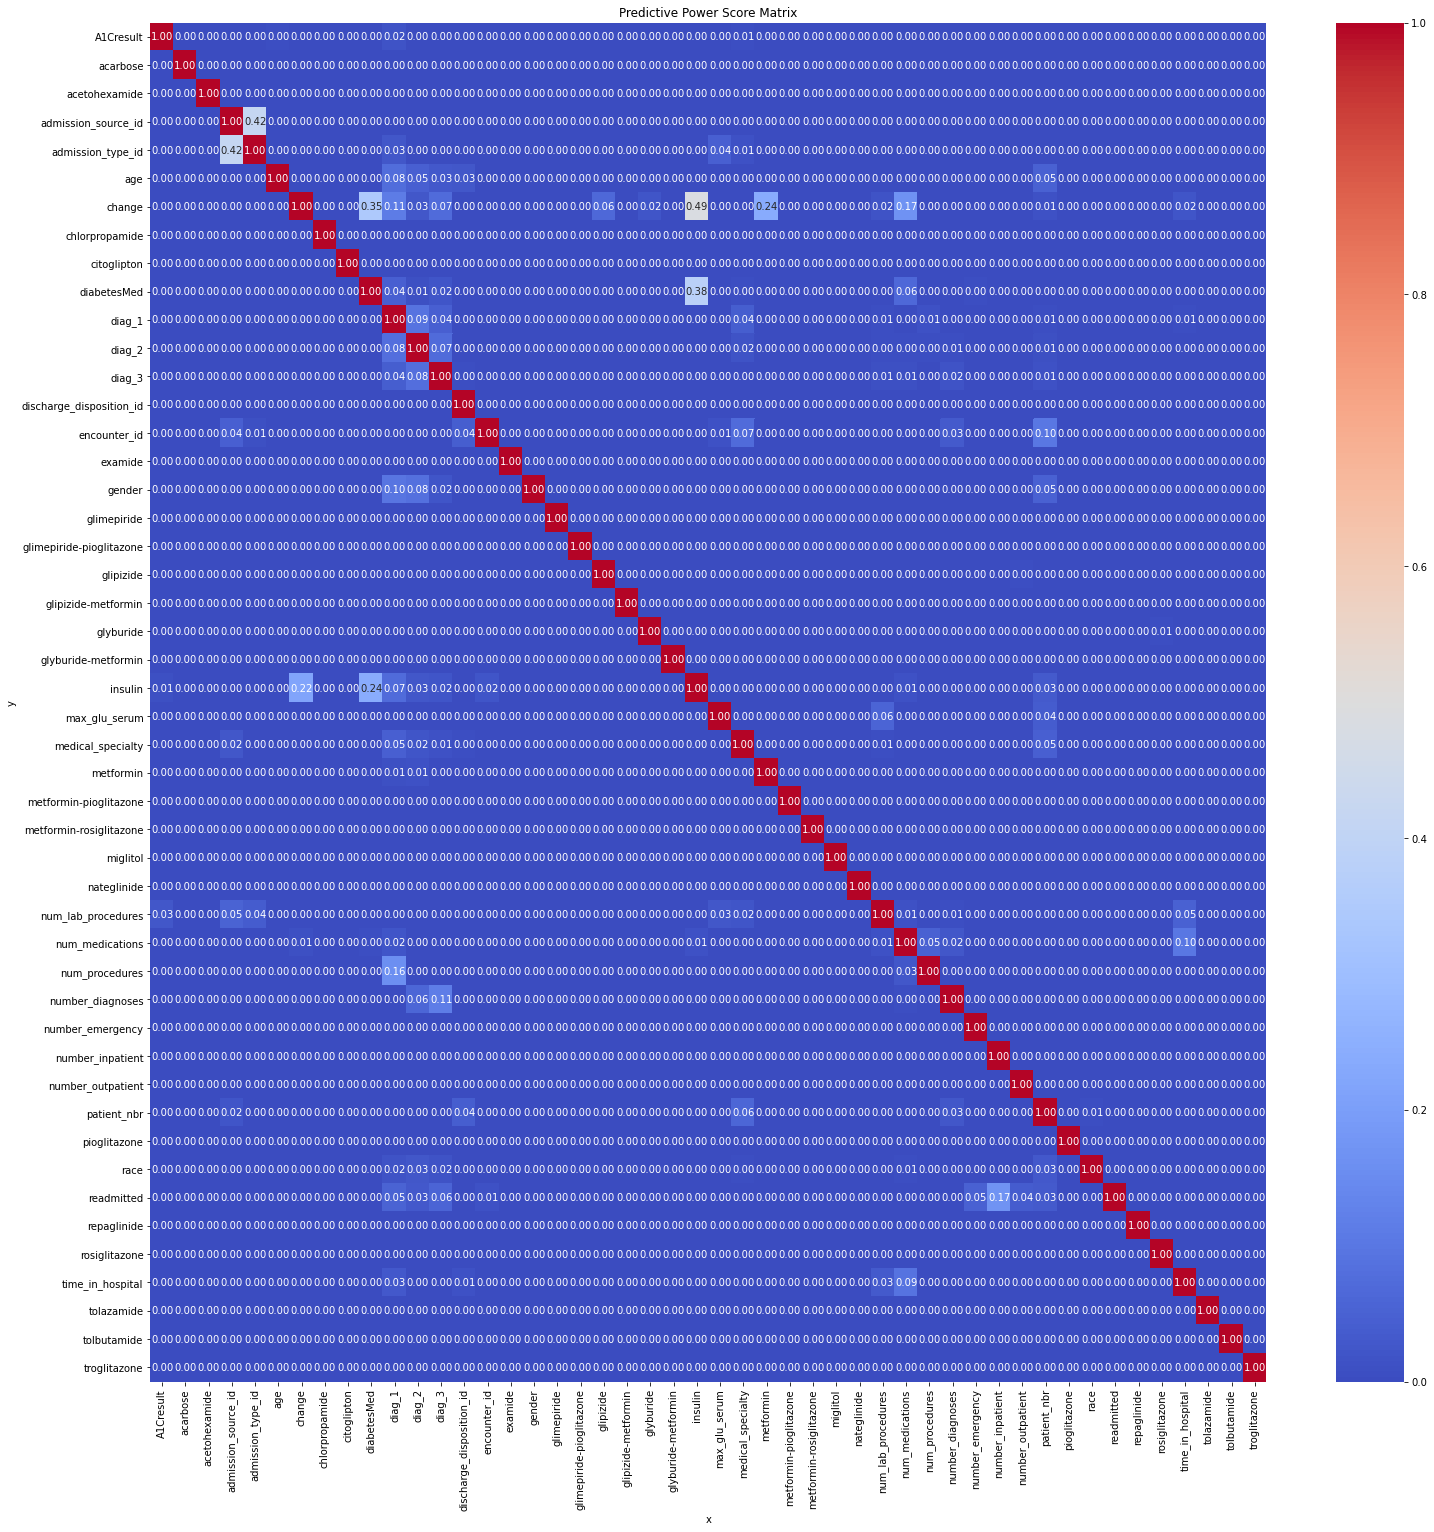

In [12]:
# Plot
plt.figure(figsize=(25, 25))
matrix_df = pps.matrix(diabetic_df).pivot(columns='x', index='y',  values='ppscore')
sns.heatmap(matrix_df, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Predictive Power Score Matrix");

#### Observations



